In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import os
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir('.'))

Current working directory: C:\Users\38631\PyCharmMiscProject\Python_projects
Files in current directory: ['.git', 'data', 'notebook.ipynb']


In [27]:
attack_df = pd.read_csv('data/UEFA_CL/attacking_data.csv')
attempts_df = pd.read_csv('data/UEFA_CL/attempts_data.csv')
defending_df = pd.read_csv('data/UEFA_CL/defending_data.csv')
disciplinary_df = pd.read_csv('data/UEFA_CL/disciplinary_data.csv')
distribution_df = pd.read_csv('data/UEFA_CL/distribution_data.csv')
goalkeeping_df = pd.read_csv('data/UEFA_CL/goalkeeping_data.csv')
goals_df = pd.read_csv('data/UEFA_CL/goals_data.csv')
key_stats_data_df = pd.read_csv('data/UEFA_CL/key_stats_data.csv')
players_df = pd.read_csv('data/UEFA_CL/players_data.csv')
teams_df = pd.read_csv('data/UEFA_CL/teams_data.csv')

In [16]:
player_goals = pd.merge(players_df, goals_df, how='left', on='id_player')
player_goals = pd.merge(player_goals, teams_df, how='left', left_on='id_team', right_on='team_id')
columns_to_drop = ['age', 'position', 'weight(kg)', 'height(cm)', 'player_image', 'team_id', 'logo' ]
player_goals = player_goals.drop(columns_to_drop, axis=1)
#print("Columns after first merge:", player_goals.columns.tolist())
#print("Teams_df columns:", teams_df.columns.tolist())

In [17]:
key_cols = ['id_player', 'id_team', 'player_name', 'nationality', 'field_position', 'team', 'country']
other_cols = [col for col in player_goals.columns if col not in key_cols]
player_goals = player_goals[key_cols + other_cols]

In [18]:
player_goals

,id_player,id_team,player_name,nationality,field_position,team,country,goals,inside_area,outside_area,right_foot,left_foot,head,other,penalties_scored
0,250016833,50037,Harry Kane,England,Forward,FC Bayern München,Germany,5.0,5.0,0.0,5.0,0.0,0.0,0.0,3.0
1,250105927,50149,Viktor Gyökeres,Sweden,Forward,Sporting Clube de Portugal,Portugal,5.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0
2,250121533,50051,Vinícius Júnior,Brazil,Forward,Real Madrid C.F.,Spain,4.0,3.0,1.0,2.0,2.0,0.0,0.0,1.0
3,250121294,50058,Tijjani Reijnders,Netherlands,Midfielder,AC Milan,Italy,3.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0
4,250160436,50023,Maghnes Akliouche,France,Midfielder,AS Monaco,France,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,250011071,50050,Scott Bain,Scotland,Goalkeeper,Celtic FC,Scotland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,250000104,50139,Carlo Pinsoglio,Italy,Goalkeeper,Juventus,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,108501,50080,Wojciech Szczęsny,Poland,Goalkeeper,FC Barcelona,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,103827,50124,César Azpilicueta,Spain,Defender,Atlético de Madrid,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
na_values = player_goals.isna().sum()
na_values

id_player           0
id_team             0
player_name         0
nationality         0
field_position      0
team                0
country             0
goals               0
inside_area         0
outside_area        0
right_foot          0
left_foot           0
head                0
other               0
penalties_scored    0
dtype: int64

In [20]:
goal_columns = ['goals','inside_area', 'outside_area', 'right_foot', 'left_foot', 'head', 'other', 'penalties_scored']
player_goals[goal_columns] = player_goals[goal_columns].fillna(0)
print(player_goals.isna().sum())

id_player           0
id_team             0
player_name         0
nationality         0
field_position      0
team                0
country             0
goals               0
inside_area         0
outside_area        0
right_foot          0
left_foot           0
head                0
other               0
penalties_scored    0
dtype: int64


In [21]:
players_duplicated = player_goals.duplicated().sum()
players_duplicated

np.int64(0)

In [22]:
player_goals.describe()

,id_player,id_team,goals,inside_area,outside_area,right_foot,left_foot,head,other,penalties_scored
count,9.080000e+02,9.080000e+02,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.414979e+08,2.695953e+05,0.226872,0.189427,0.037445,0.118943,0.075991,0.026432,0.004405,0.024229
std,4.522600e+07,7.156461e+05,0.650048,0.584076,0.201228,0.456672,0.341468,0.173700,0.066262,0.192090
min,6.917800e+04,7.889000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500805e+08,5.005100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.501215e+08,5.013800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.501668e+08,5.275800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.502042e+08,2.603790e+06,5.000000,5.000000,2.000000,5.000000,4.000000,2.000000,1.000000,3.000000


In [23]:
player_goals.dtypes

id_player             int64
id_team               int64
player_name          object
nationality          object
field_position       object
team                 object
country              object
goals               float64
inside_area         float64
outside_area        float64
right_foot          float64
left_foot           float64
head                float64
other               float64
penalties_scored    float64
dtype: object

In [24]:
player_goals

,id_player,id_team,player_name,nationality,field_position,team,country,goals,inside_area,outside_area,right_foot,left_foot,head,other,penalties_scored
0,250016833,50037,Harry Kane,England,Forward,FC Bayern München,Germany,5.0,5.0,0.0,5.0,0.0,0.0,0.0,3.0
1,250105927,50149,Viktor Gyökeres,Sweden,Forward,Sporting Clube de Portugal,Portugal,5.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0
2,250121533,50051,Vinícius Júnior,Brazil,Forward,Real Madrid C.F.,Spain,4.0,3.0,1.0,2.0,2.0,0.0,0.0,1.0
3,250121294,50058,Tijjani Reijnders,Netherlands,Midfielder,AC Milan,Italy,3.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0
4,250160436,50023,Maghnes Akliouche,France,Midfielder,AS Monaco,France,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,250011071,50050,Scott Bain,Scotland,Goalkeeper,Celtic FC,Scotland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
904,250000104,50139,Carlo Pinsoglio,Italy,Goalkeeper,Juventus,Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,108501,50080,Wojciech Szczęsny,Poland,Goalkeeper,FC Barcelona,Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,103827,50124,César Azpilicueta,Spain,Defender,Atlético de Madrid,Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Clubs by goals

In [82]:
top_10_club_goals = player_goals.groupby('team')['goals'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_club_goals


,team,goals
0,FC Barcelona,14.0
1,Borussia Dortmund,13.0
2,FC Bayern München,11.0
3,Liverpool FC,10.0
4,Manchester City,10.0
5,AS Monaco,10.0
6,GNK Dinamo,10.0
7,Sporting Clube de Portugal,9.0
8,Celtic FC,9.0
9,Real Madrid C.F.,9.0


Goals by club

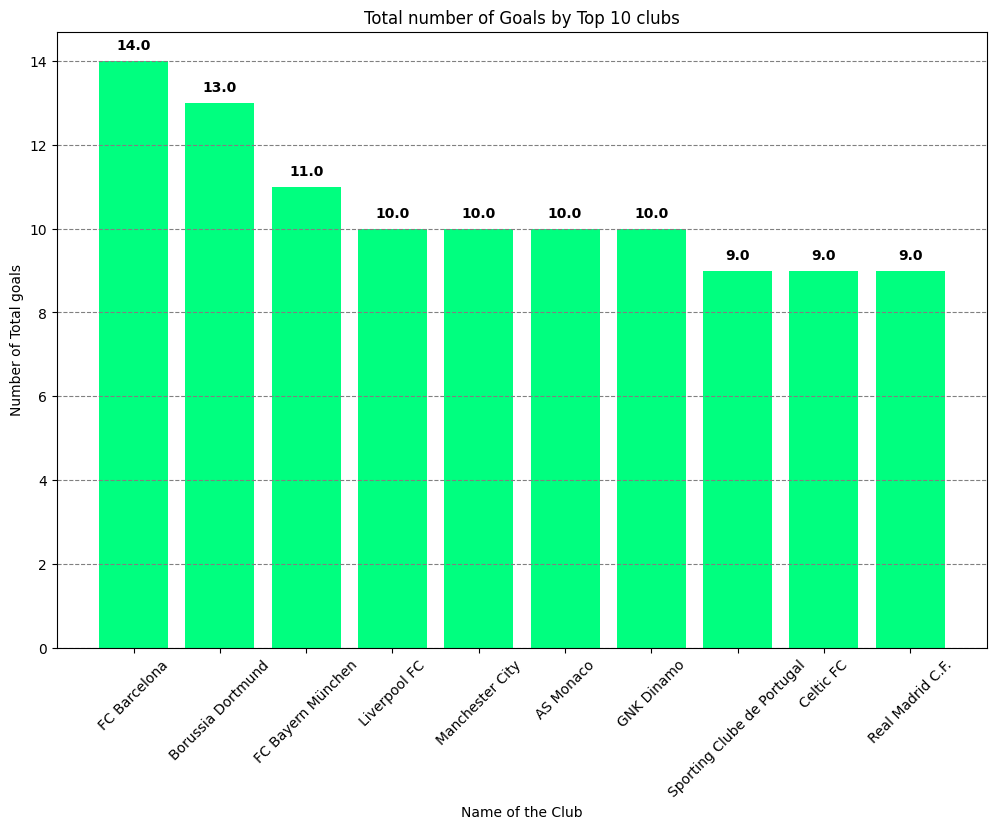

In [94]:
plt.figure(figsize=(12,8))
bars = plt.bar(top_10_club_goals['team'], top_10_club_goals['goals'], color= 'springgreen')
plt.title('Total number of Goals by Top 10 clubs')
plt.xlabel('Name of the Club')
plt.ylabel('Number of Total goals')
plt.xticks(rotation=45)
plt.grid(axis='y', color='grey', linestyle='dashed')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, str(yval),
             ha='center', va='bottom', fontweight='bold')

plt.show()

Top 10 clubs by goals scored with penalties

In [81]:
top_10_club_goals_penalties = player_goals.groupby('team')['penalties_scored'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_club_goals_penalties

,team,penalties_scored
0,Borussia Dortmund,3.0
1,FC Bayern München,3.0
2,FC Internazionale Milano,2.0
3,SL Benfica,2.0
4,Sporting Clube de Portugal,2.0
5,LOSC Lille,2.0
6,AS Monaco,1.0
7,Juventus,1.0
8,Manchester City,1.0
9,FK Crvena Zvezda,1.0


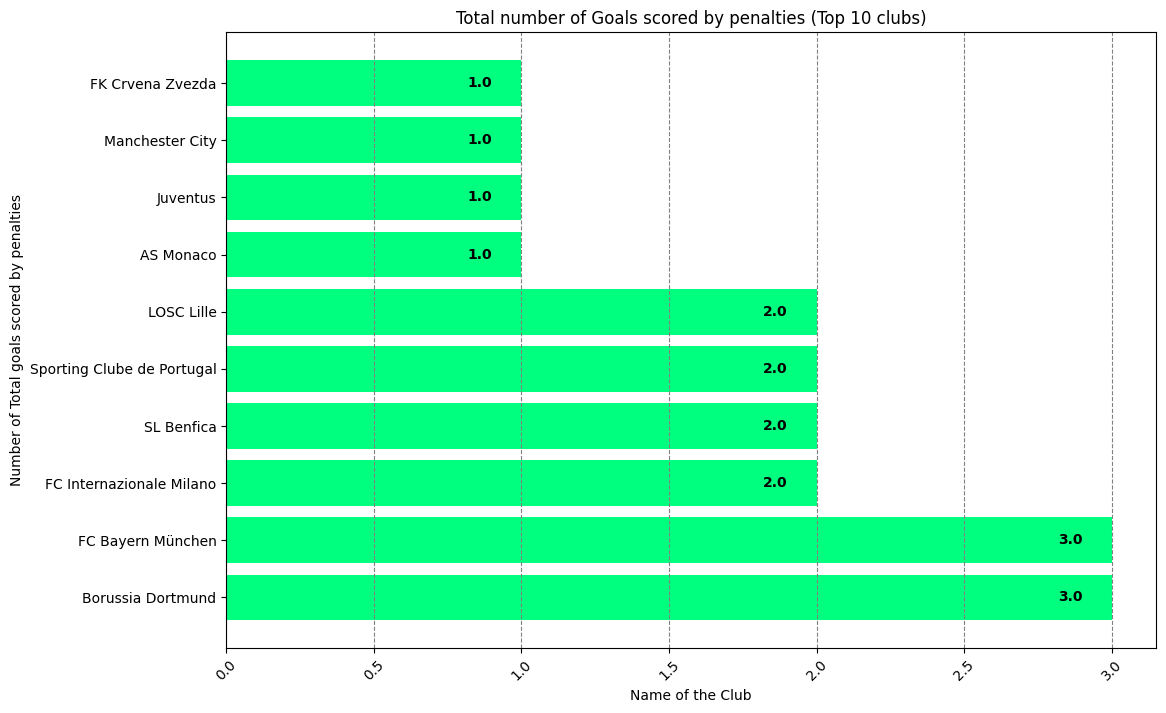

In [95]:
plt.figure(figsize=(12,8))
bars_h = plt.barh(top_10_club_goals_penalties['team'], top_10_club_goals_penalties['penalties_scored'], color= 'springgreen')
plt.title('Total number of Goals scored by penalties (Top 10 clubs)')
plt.xlabel('Name of the Club')
plt.ylabel('Number of Total goals scored by penalties')
plt.xticks(rotation=45)
plt.grid(axis='x', color='gray', linestyle='dashed')

for bar in bars_h:
    width = bar.get_width()
    plt.text(width - 0.1,
             bar.get_y() + bar.get_height()/2,
             str(width),
             ha='right', va='center', color='black', fontweight='bold')


plt.show()

Top 15 players by goals

In [73]:
top_15_players = player_goals[['player_name', 'goals']].sort_values('goals', ascending=False).head(15).reset_index()
top_15_players

,index,player_name,goals
0,148,Robert Lewandowski,5.0
1,155,Raphinha,5.0
2,1,Viktor Gyökeres,5.0
3,0,Harry Kane,5.0
4,238,Jonathan David,4.0
5,2,Vinícius Júnior,4.0
6,348,Sandro Kulenović,3.0
7,448,Karim Adeyemi,3.0
8,309,Abdallah Sima,3.0
9,329,Luis Díaz,3.0


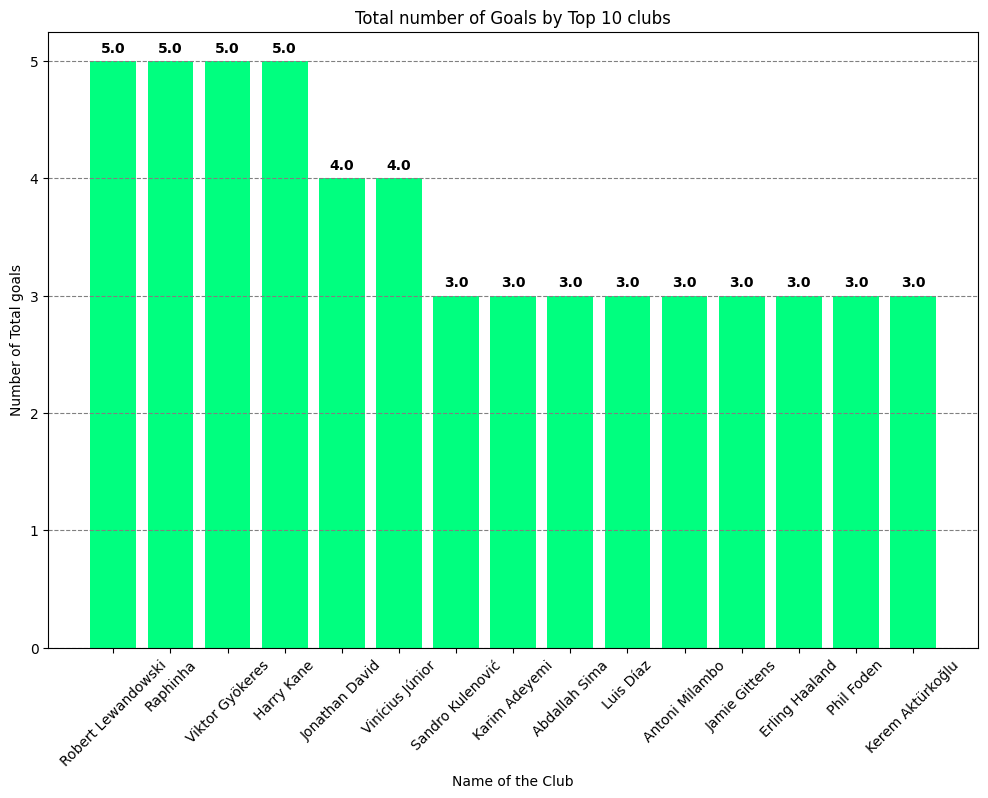

In [92]:
plt.figure(figsize=(12,8))
bars_p = plt.bar(top_15_players['player_name'], top_15_players['goals'], color= 'springgreen')
plt.title('Total number of Goals by Top 10 clubs')
plt.xlabel('Name of the Club')
plt.ylabel('Number of Total goals')
plt.xticks(rotation=45)
plt.grid(axis='y', color='grey', linestyle='dashed')

for bar in bars_p:
    yval_2 = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval_2 + 0.05, str(yval_2),
             ha='center', va='bottom', fontweight='bold')

plt.show()

Top 15 players by goals strenghts ( left, right, head,...)

In [84]:
top_15_players_strength = player_goals[['player_name', 'goals', 'right_foot', 'left_foot', 'head', 'penalties_scored']].sort_values('goals', ascending=False).head(15).reset_index()
top_15_players_strength

,index,player_name,goals,right_foot,left_foot,head,penalties_scored
0,148,Robert Lewandowski,5.0,2.0,2.0,0.0,0.0
1,155,Raphinha,5.0,1.0,4.0,0.0,0.0
2,1,Viktor Gyökeres,5.0,5.0,0.0,0.0,2.0
3,0,Harry Kane,5.0,5.0,0.0,0.0,3.0
4,238,Jonathan David,4.0,3.0,1.0,0.0,2.0
5,2,Vinícius Júnior,4.0,2.0,2.0,0.0,1.0
6,348,Sandro Kulenović,3.0,2.0,1.0,0.0,0.0
7,448,Karim Adeyemi,3.0,0.0,3.0,0.0,0.0
8,309,Abdallah Sima,3.0,1.0,2.0,0.0,0.0
9,329,Luis Díaz,3.0,3.0,0.0,0.0,0.0
